In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv('/content/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv('/content/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
import seaborn as sb

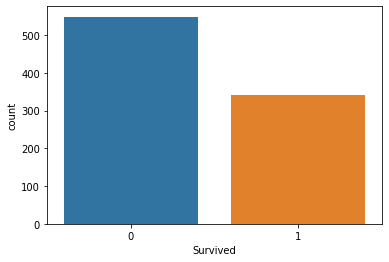

In [6]:
sb.countplot(x="Survived",data=train)

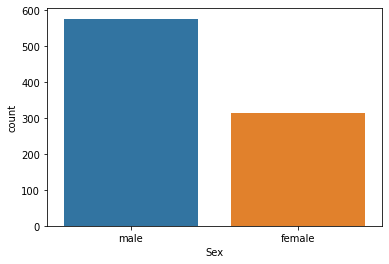

In [7]:
sb.countplot(x="Sex",data=train)

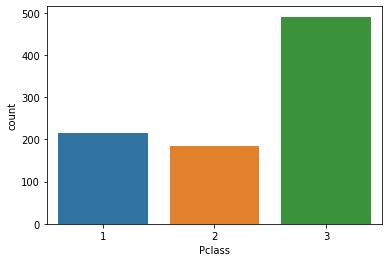

In [8]:
sb.countplot(x="Pclass",data=train)

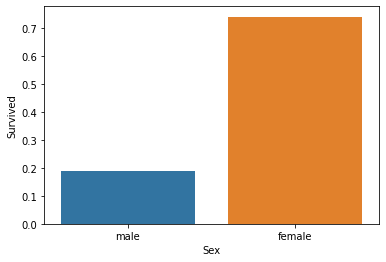

In [9]:
sb.barplot(x="Sex",y="Survived",data=train,ci=None)

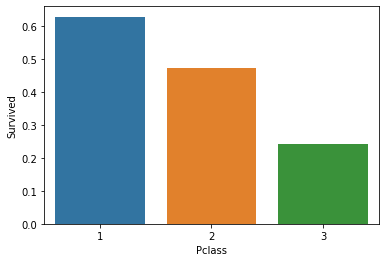

In [10]:
sb.barplot(x="Pclass",y="Survived",data=train,ci=None)

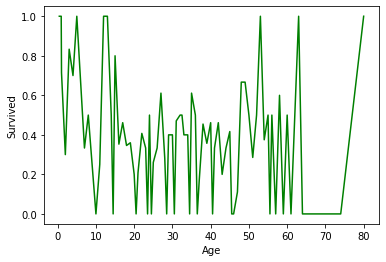

In [11]:
sb.lineplot(x="Age",y="Survived",data=train,ci=None,color="green")

Sex is in categorical format so, creating another column by converting sex into numerical value

In [12]:
print(train['Sex'].dtype)

object


In [13]:
train['Sex']=train['Sex'].astype('category')

In [14]:
train['Sex']=train['Sex'].cat.codes

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [16]:
print(train['Name'].dtype)

object


In [17]:
train['Name']=train['Name'].astype('category')
train['Name']=train['Name'].cat.codes

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,190,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,353,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,272,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,15,1,35.0,0,0,373450,8.0500,NaN,S


In [19]:
print(train['Ticket'].dtype)

object


In [20]:
train['Ticket']=train['Ticket'].astype('category')
train['Ticket']=train['Ticket'].cat.codes
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,NaN,S
1,2,1,1,190,0,38.0,1,0,596,71.2833,C85,C
2,3,1,3,353,0,26.0,0,0,669,7.9250,NaN,S
3,4,1,1,272,0,35.0,1,0,49,53.1000,C123,S
4,5,0,3,15,1,35.0,0,0,472,8.0500,NaN,S


In [21]:
train['Embarked']=train['Embarked'].astype('category')
train['Embarked']=train['Embarked'].cat.codes
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,NaN,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,C85,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,NaN,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,C123,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,NaN,2


We can do the whole process using Pclass instead of Cabin. And there is so much null values, so we can drop Cabin Column.

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,NaN,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,C85,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,NaN,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,C123,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,NaN,2


In [23]:
train['Cabin']=train['Cabin'].astype('category')
train['Cabin']=train['Cabin'].cat.codes
train['Cabin'].mean()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,-1,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,-1,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,-1,2


In [24]:
train.loc[train['Cabin']<=0,'Cabin']=17

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,17,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,17,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,17,2


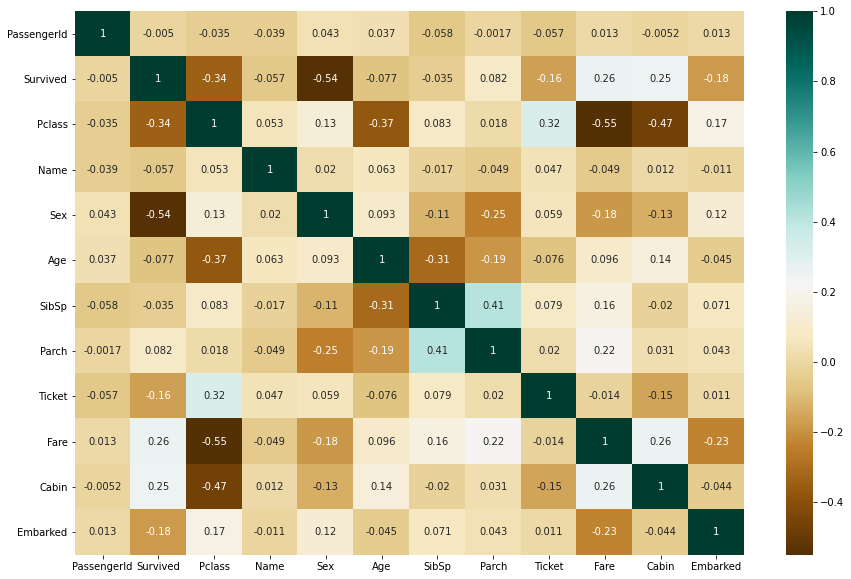

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
c= train.corr()
sb.heatmap(c,cmap="BrBG",annot=True)

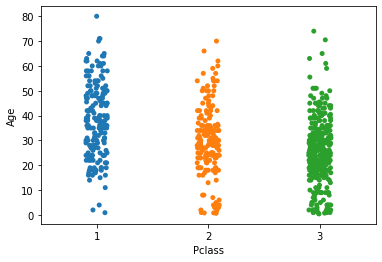

In [27]:
sb.stripplot(x="Pclass",y="Age",data=train)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 55.8 KB


In [29]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

Here we can see that, there is so much NaN values in Age field. Now we will use Imputer and will fill up the NaN values by mean values of age.

In [30]:
train['Age'].mean()

29.69911764705882

In [31]:
train['Age']=train['Age'].replace(np.nan,29.69).copy()

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 55.8 KB


In [33]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,17,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,17,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,17,2


Now we have to work with test data set. 

In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


As usual we can drop the cabin field as it is not manadatory.

In [37]:
test['Age'].mean()

30.272590361445783

In [38]:
test['Age']=test['Age'].replace(np.nan,30.27).copy()

In [39]:
test['Sex']=test['Sex'].astype('category')
test['Sex']=test['Sex'].cat.codes

In [40]:
test['Name']=test['Name'].astype('category')
test['Name']=test['Name'].cat.codes

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int16  
 3   Sex          418 non-null    int8   
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int16(1), int64(4), int8(1), object(3)
memory usage: 30.7+ KB


In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,17,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,17,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,17,2


In [43]:
test['Fare'].mean()

35.6271884892086

In [44]:
test['Fare']=test['Fare'].replace(np.nan,35.62).copy()

In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,403,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,269,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,408,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,178,0,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
test['Embarked']=test['Embarked'].astype('category')
test['Embarked']=test['Embarked'].cat.codes

In [47]:
test['Cabin']=test['Cabin'].astype('category')
test['Cabin']=test['Cabin'].cat.codes

In [48]:
test.head(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.50,0,0,330911,7.8292,-1,1
1,893,3,403,0,47.00,1,0,363272,7.0000,-1,2
2,894,2,269,1,62.00,0,0,240276,9.6875,-1,1
3,895,3,408,1,27.00,0,0,315154,8.6625,-1,2
4,896,3,178,0,22.00,1,1,3101298,12.2875,-1,2
5,897,3,366,1,14.00,0,0,7538,9.2250,-1,2
6,898,3,84,0,30.00,0,0,330972,7.6292,-1,1
7,899,2,57,1,26.00,1,1,248738,29.0000,-1,2
8,900,3,4,0,18.00,0,0,2657,7.2292,-1,0
9,901,3,103,1,21.00,2,0,A/4 48871,24.1500,-1,2


In [49]:
test['Cabin'].mean()

7.2009569377990434

In [50]:
test.loc[test['Cabin']==-1,'Cabin']=7

In [51]:
test.head(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.50,0,0,330911,7.8292,7,1
1,893,3,403,0,47.00,1,0,363272,7.0000,7,2
2,894,2,269,1,62.00,0,0,240276,9.6875,7,1
3,895,3,408,1,27.00,0,0,315154,8.6625,7,2
4,896,3,178,0,22.00,1,1,3101298,12.2875,7,2
5,897,3,366,1,14.00,0,0,7538,9.2250,7,2
6,898,3,84,0,30.00,0,0,330972,7.6292,7,1
7,899,2,57,1,26.00,1,1,248738,29.0000,7,2
8,900,3,4,0,18.00,0,0,2657,7.2292,7,0
9,901,3,103,1,21.00,2,0,A/4 48871,24.1500,7,2


In [52]:
test['Ticket']=test['Ticket'].astype('category')
test['Ticket']=test['Ticket'].cat.codes
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,7,1
1,893,3,403,0,47.0,1,0,221,7.0000,7,2
2,894,2,269,1,62.0,0,0,73,9.6875,7,1
3,895,3,408,1,27.0,0,0,147,8.6625,7,2
4,896,3,178,0,22.0,1,1,138,12.2875,7,2


Now we have to split train data into test data and train data.

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,17,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,17,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,17,2


Now we will update the Survived field.

We already observe that, most of the female survived, 1st and 2nd class passengers survived most and age between 19 to 50 died most.

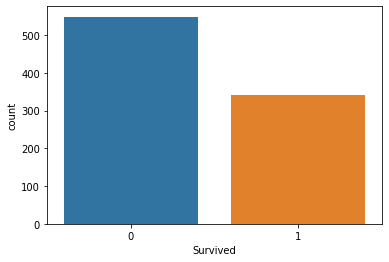

In [54]:
sb.countplot(x="Survived",data=train)

In [55]:
train['Survived'].sum()

342

Splitting into test data and train data.

In [56]:
target=train['Survived']
train=train.drop(['Survived'],axis=1)
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Feature Selection

Wrapper Method (Recursive Feature Elimination)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(train,target, test_size = 0.3, random_state = 42)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.440834


In [58]:
cols = list(train.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 6)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(train,target)  
#Fitting the data to model
model.fit(X_rfe,target)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [59]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.0,1,0,523,7.2500,17,2
1,2,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,3,353,0,26.0,0,0,669,7.9250,17,2
3,4,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,3,15,1,35.0,0,0,472,8.0500,17,2


In [60]:
train=train.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1).copy()

In [61]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,2
1,1,0,38.0,1,0,0
2,3,0,26.0,0,0,2
3,1,0,35.0,1,0,2
4,3,1,35.0,0,0,2


Dataset Splitting

In [62]:

x_train,x_test,y_train,y_test=train_test_split(train,target,test_size=0.3,random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
scaler=StandardScaler().fit(x_test)
x_test=scaler.transform(x_test)

Modelling

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [65]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)
print("Accuracy: ", log_reg.score(x_test,y_test))

Accuracy:  0.8097014925373134


In [66]:
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(x_train, y_train)
print("Accuracy: ", rf_reg.score(x_test,y_test))

Accuracy:  0.7798507462686567


In [67]:
svm_clsf = SVC()
svm_clsf.fit(x_train, y_train)
print("Accuracy: ", svm_clsf.score(x_test,y_test))

Accuracy:  0.8171641791044776


In [68]:
best_knn = []
for n in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    best_knn.insert(n, knn.score(x_test,y_test))
best_knn

[0.7574626865671642,
 0.7947761194029851,
 0.7835820895522388,
 0.7686567164179104,
 0.7761194029850746,
 0.7835820895522388,
 0.7873134328358209,
 0.7873134328358209,
 0.7873134328358209,
 0.7910447761194029,
 0.7947761194029851]

In [69]:
knn_clsf = KNeighborsClassifier(n_neighbors=11)
knn_clsf.fit(x_train, y_train)
print("Accuracy: ", knn_clsf.score(x_test,y_test))

Accuracy:  0.7947761194029851


In [70]:
voting_classfication = VotingClassifier(estimators = [('knn', knn_clsf),('lg', log_reg), ('rfg', rf_reg), ('svc', svm_clsf)], voting="hard", n_jobs=-1)
voting_classfication.fit(x_train, y_train)
print("Accuracy: ", voting_classfication.score(x_test,y_test))

Accuracy:  0.8208955223880597


In [71]:
from sklearn.svm import SVC
clas = SVC(kernel = 'linear', random_state = 0)
clas.fit(x_train, y_train)
print("Accuracy: ",clas.score(x_test,y_test))

Accuracy:  0.7910447761194029


In [72]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,7,1
1,893,3,403,0,47.0,1,0,221,7.0000,7,2
2,894,2,269,1,62.0,0,0,73,9.6875,7,1
3,895,3,408,1,27.0,0,0,147,8.6625,7,2
4,896,3,178,0,22.0,1,1,138,12.2875,7,2


In [73]:
test1=test.drop(['PassengerId','Name','Parch','Fare','Cabin'],axis=1).copy()

In [74]:
test1.head()

,Pclass,Sex,Age,SibSp,Ticket,Embarked
0,3,1,34.5,0,152,1
1,3,0,47.0,1,221,2
2,2,1,62.0,0,73,1
3,3,1,27.0,0,147,2
4,3,0,22.0,1,138,2


In [75]:
scale=StandardScaler().fit(test1)
test1=scale.transform(test1)

In [76]:
pred=voting_classfication.predict(test1)

In [77]:
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [78]:
test_result = pd.Series(voting_classfication.predict(test1), name = "Survived").astype(int)
results = pd.concat([test["PassengerId"], test_result],axis = 1)
results.to_csv("lolly_submission.csv", index = False)